<a href="https://colab.research.google.com/github/GNC0610/INYRN-2025-1925361/blob/main/AF6_ArbolDeDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 6: Aprendizaje supervisado, árbol de decisión**


*   1799047 Eva Melissa Aguilar Frayre N4
*   2045431 Carlos Eduardo Reyes Rodríguez N4
*   2054276 Megan Johana Hernández Jasso N4
*   2049765 Daena victoria Santiago del Ángel N4
*   1925361 Guillermo Niño Camacho N4



1.Carga de las librerias a utilizar en la Actividad 6:

In [ ]:
# Carga de librerias a utilizar
import matplotlib.pyplot as plt
from sklearn.datasets import data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import numpy as np

2.Carga de datos:

In [ ]:
#Abrir el Archivo
df=pd.read_csv("/content/sample_data/data.csv",header=0)
df[:5]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#clasificacion de datos en la matriz
X1=df.iloc[:,[0,2,3,4]].values
Y1=df.iloc[:,1].values
#Imprimir las clases
print('Etiquetas de Clase:',np.unique(Y1))

Etiquetas de Clase: ['B' 'M']


3.Procesamiento de los datos para el entrenamiento:

In [ ]:
#Vamos a realizar el entrenamiento del arbol de decision
x_train, x_test, y_train, y_test=train_test_split(X1,Y1,test_size=0.3,random_state=42)

4.Estandarizacion de los datos:

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

5.Entrenamiento de nuestro modelo:

In [ ]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

#Presicion del entrenamiento y Testeo
print('Precisión del modelo:',clf.score(x_train,y_train))
print('Precisión del modelo:',clf.score(x_test,y_test))

Precisión del modelo: 1.0
Precisión del modelo: 0.8771929824561403


6.Prueba del modelo

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
#Obtener matriz de confusión
conf_matrix= confusion_matrix(y_pred,y_test)

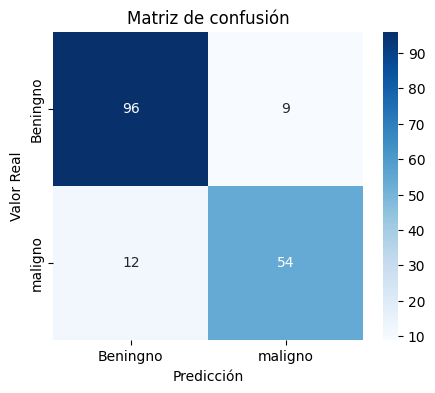

In [ ]:
#Mostrar la matriz de confusión
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap="Blues",xticklabels=["Beningno","maligno"],yticklabels=["Beningno","maligno"])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de confusión')
plt.show()

7.Predicciones del modelo:

In [ ]:
#Prediccion 1
print(y_pred[1])
print(y_test[1])

M
M


In [ ]:
#Prediccion 2
print(y_pred[15])
print(y_test[15])

M
M


In [ ]:
#Prediccion 3
print(y_pred[-1])
print(y_test[-1])

B
B


In [ ]:
iris = load_iris()
target_names = np.unique(y_test)
accuracy= accuracy_score(y_test,y_pred)
print('accuracy:',accuracy)
print("classification_report:\n", classification_report(y_test, y_pred, target_names=target_names))

accuracy: 0.8771929824561403
classification_report:
               precision    recall  f1-score   support

           B       0.91      0.89      0.90       108
           M       0.82      0.86      0.84        63

    accuracy                           0.88       171
   macro avg       0.87      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171



Visualizacion del Arbol de Desicion:

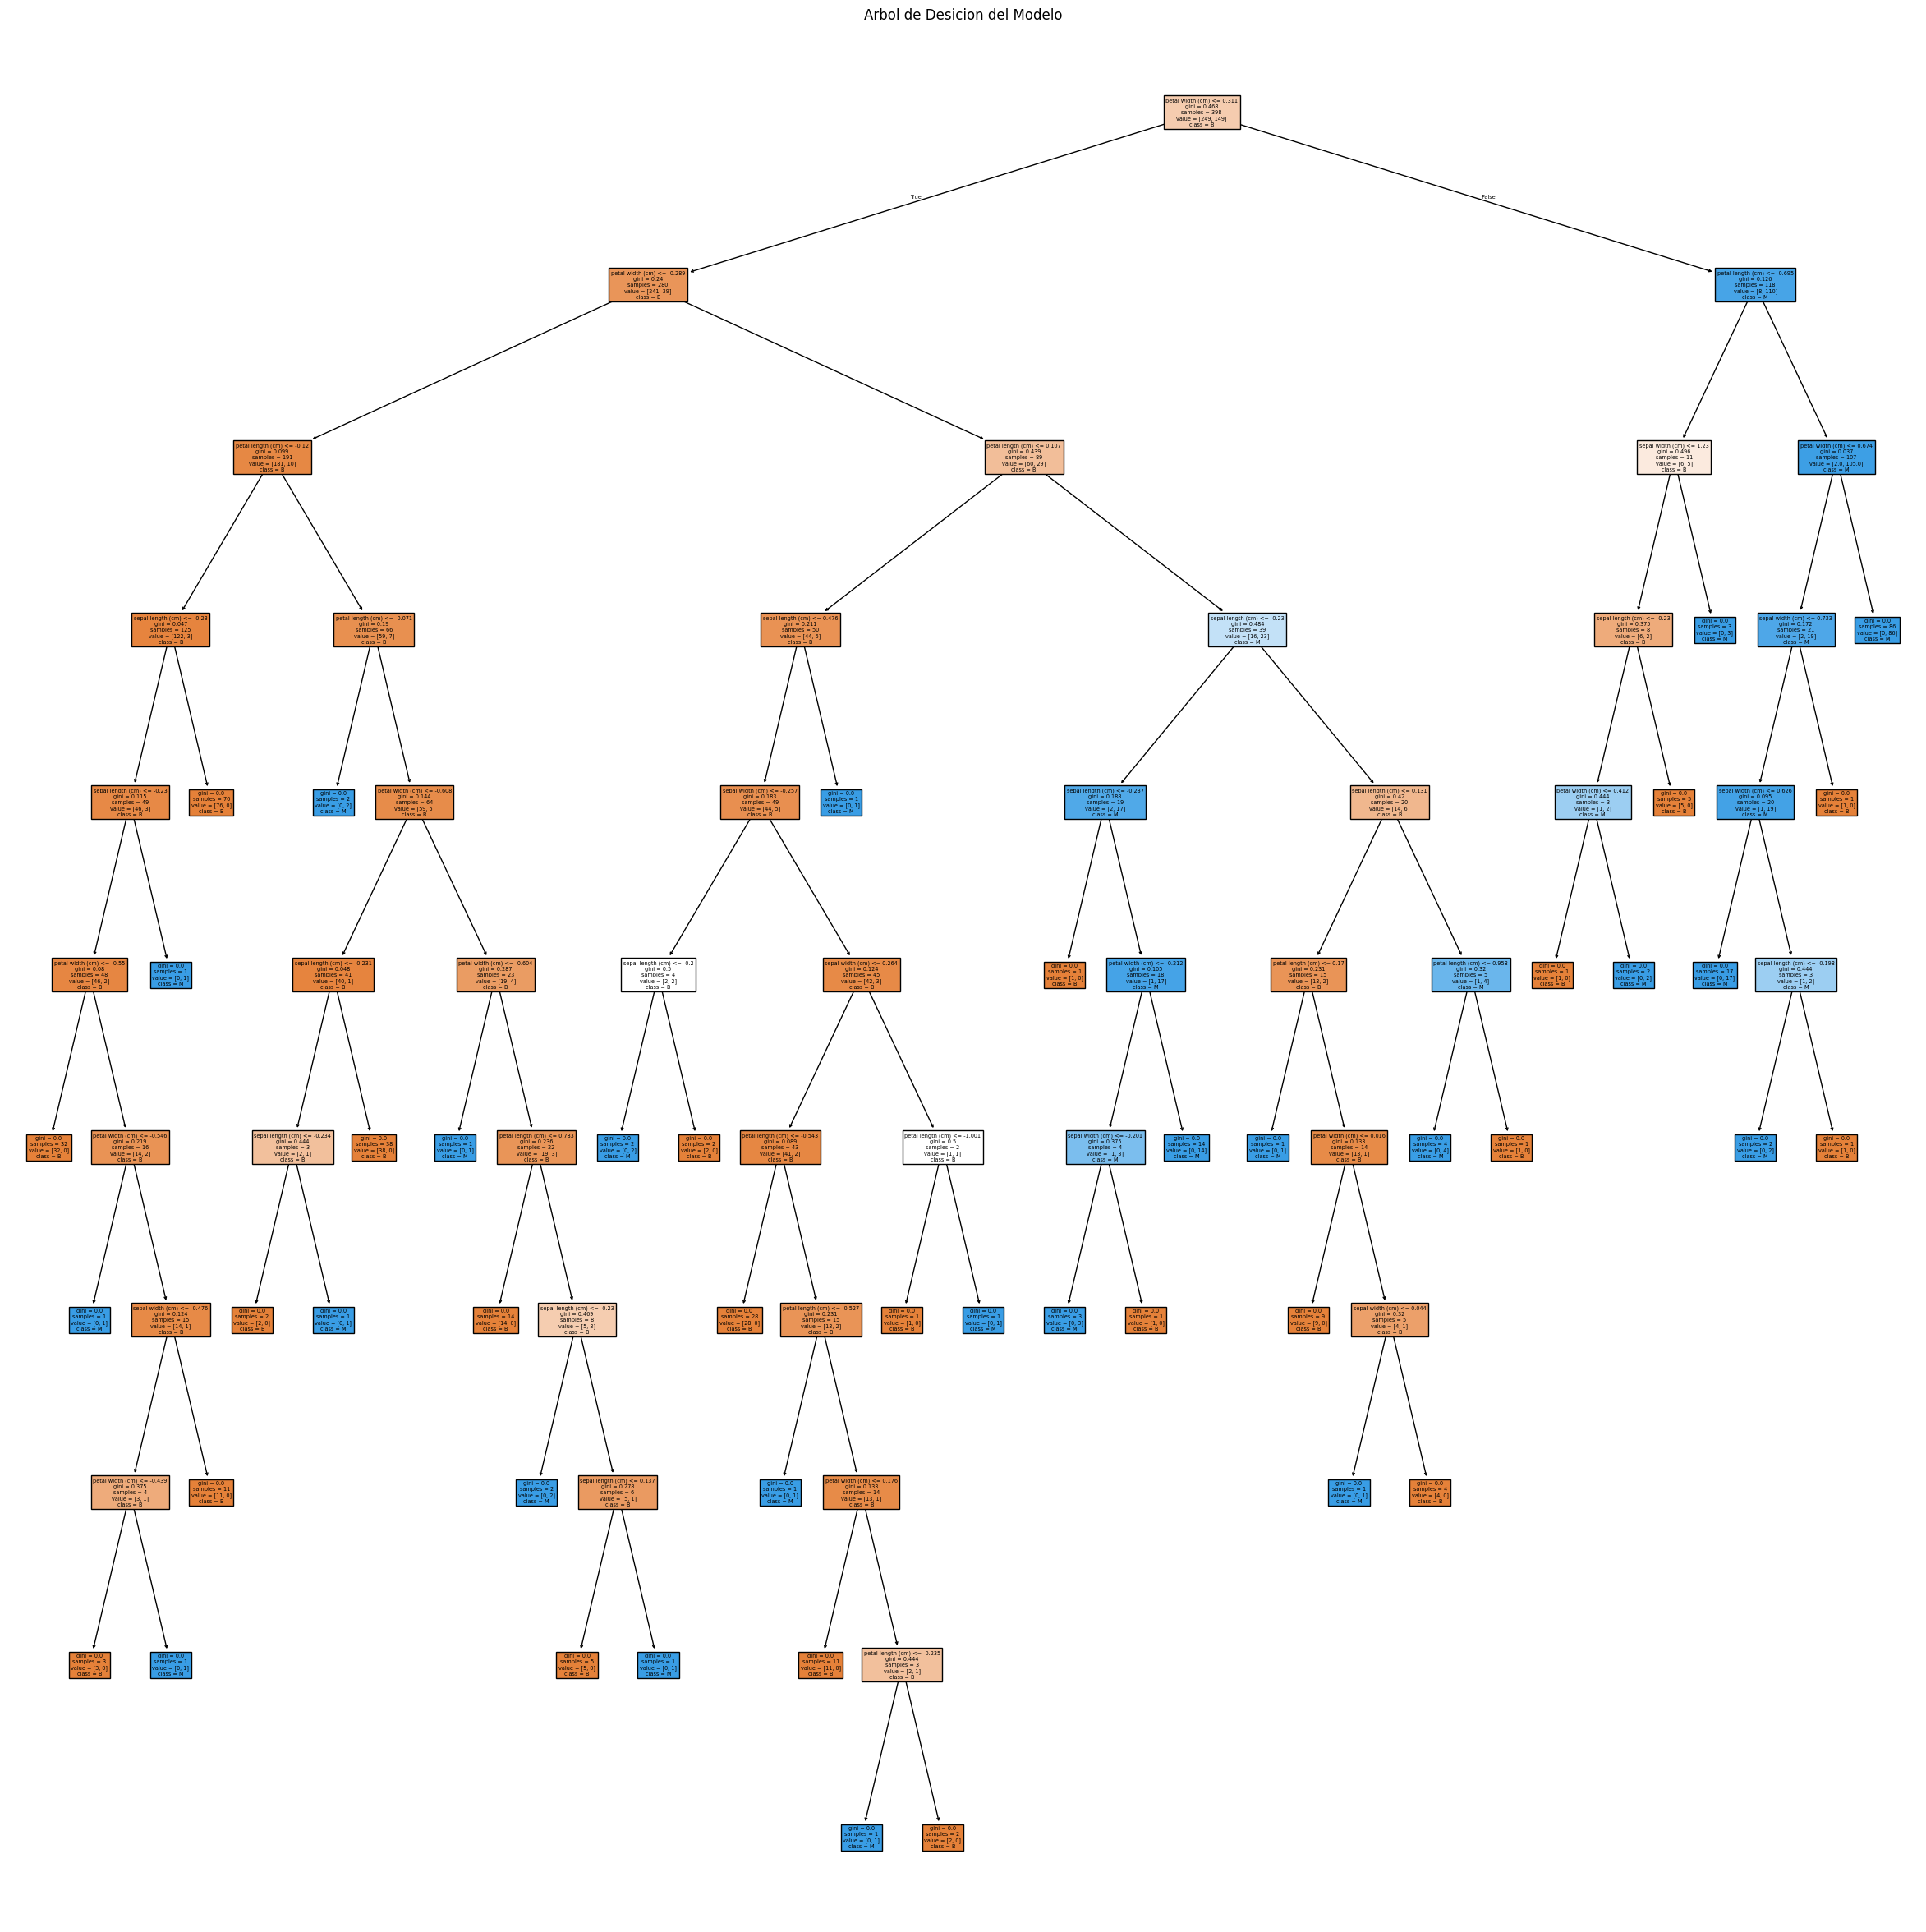

In [ ]:
plt.figure(figsize=(30,30))
tree.plot_tree(clf,filled=True,feature_names=iris.feature_names,class_names=target_names)
plt.title("Arbol de Desicion del Modelo")
plt.savefig("Arbol de Desicion ACT.6.png",dpi=600)
plt.show()